# Directional Coupler EMEPy Tutorial

This tutorial utilizes EMEPy's new feature, the profile monitor, to estimate the coupling length of a standard silicon directional coupler. 

In [1]:
from emepy import Layer, EME, Mode, MSEMpy
import numpy as np
from matplotlib import pyplot as plt
from emepy.tools import Si, SiO2

# Geometric parameters
wavelength = 1.55 # Wavelength
width = 0.4  # Width of left waveguide
gap = 0.2 # Gap between waveguides
thickness = 0.22  # Thickness of left waveguide
num_modes=2 # Number of modes
mesh=100 # Number of mesh points
core_index=Si(wavelength) # Silicon core
cladding_index=SiO2(wavelength) # Oxide cladding
x = np.linspace(-2,2,mesh)
n = np.ones(mesh) * cladding_index

### Define structure and verify shape

In [2]:
# Create simulation 
eme = EME()

# Create left waveguide
single_left_edge = -gap/2-width
single_right_edge = -gap/2
single_n = np.where((single_left_edge <= x) * (x <= single_right_edge), core_index, n)

single_channel = MSEMpy(
    wavelength,
    width=None,
    thickness=thickness,
    cladding_index=cladding_index,
    num_modes=num_modes,
    mesh=mesh,
    x=x,
    y=x,
    n=single_n
)

# Create left waveguide
left_edge = -gap/2-width
right_edge = -gap/2
n = np.where((left_edge <= x) * (x <= right_edge), core_index, n)

# Create right waveguide
left_edge = gap/2
right_edge = gap/2+width
n = np.where((left_edge <= x) * (x <= right_edge), core_index, n)

two_channel = MSEMpy(
    wavelength,
    width=None,
    thickness=thickness,
    cladding_index=cladding_index,
    num_modes=num_modes,
    mesh=mesh,
    x=x,
    y=x,
    n=n
)

eme.add_layer(Layer(single_channel, num_modes, wavelength, 0.7)) 
eme.add_layer(Layer(two_channel, num_modes, wavelength, 25))

current state: start


### Add a monitor

In [3]:
monitor = eme.add_monitor(axes="xz")

### Propagate

In [4]:
eme.propagate()  # propagate at given wavelength

No sources defined, defaulting to left_coeffs=[1]
current state: mode_solving


2it [00:09,  4.85s/it]


current state: finished_modes
current state: layer_propagating


1it [00:00, 11.64it/s]


current state: finished_layer
current state: network_building
current state: finished_network
current state: field_propagating


2it [00:00,  7.79it/s]


current state: finished


### Visualize Monitors

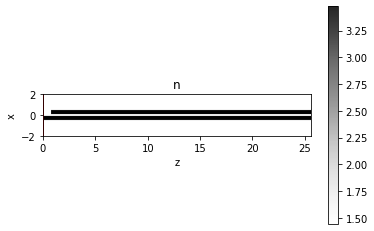

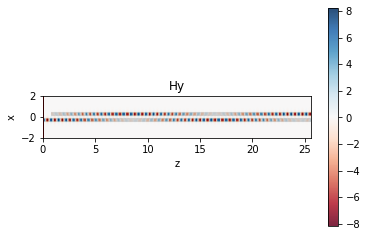

In [5]:
plt.figure()
monitor.visualize(component="n")
plt.colorbar()
plt.show()

plt.figure()
monitor.visualize(component="Hy")
plt.colorbar()
plt.show()